# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [101]:
def dna_complementary(seq,direction):
    # set a parameter to test if the input is available
    rnd = True
    # set a for loop to look through each character in the sequence. Here use the seq.upper() to distinguish the unavailable input
    #that contains lower case to not nucleotide character. 
    #Transform sequence to upper case.
    for s in str(seq):
            #If the character is not A or T or C or G, set the parameter 'rnd' to false indicate the input is unavailable 
            #which contain none-nucleotide character.
            if s not in ["A","C","G",'T','a','c','t','g']:
                rnd =False
    
    #If statement to judge whethter the input contain non-nucleotide character.
    if rnd==True:
        seq=seq.upper()
        #If statement to judge whether the input parameter is the same direction or reverse.
        if direction=='same':
            #Set a parameter 'new_str' to storage the generated complementary sequence.
            new_str=''
            #According to the complementarity principle generates the new string.
            #Here we use the ascII table to transfer the  character
            #In ASCII table, whether the character is upper case or lower case, there substraction is constant.
            #Thus We just need one if statement to transfer for example G to C or g to c.
            #The ord can transfer character to number and chr transfer number to character in ASCII.
            for s in range(0,len(seq)):
                if seq[s]=="G":
                    new_str=new_str+ chr(ord(seq[s])-4)
                elif seq[s]=="C":
                    new_str=new_str+chr(ord(seq[s])+4)
                elif seq[s]=="A":
                    new_str=new_str+chr(ord(seq[s])+19)
                elif seq[s]=="T":
                    new_str=new_str+chr(ord(seq[s])-19) 
            return (new_str)
        
        elif direction =="reverse":
            #Set a parameter 'new_str' to storage the generated complementary sequence.
            new_str=''
            #Set a parameter 'long' to indicate the position of the last character.
            long=len(seq)-1
            
            #According to the complementarity principle generates the new string.
            #Here we use the ascII table to transfer the  character
            #In ASCII table, whether the character is upper case or lower case, there substraction is constant.
            #Thus We just need one if statement to transfer for example G to C or g to c.
            #The ord can transfer character to number and chr transfer number to character in ASCII.
            
            for s in range(0,len(seq)):
                # long-s indicate the corresponding position of reverse sequence and same sequence
                if seq[long-s]=="G":
                    new_str=new_str+ chr(ord(seq[long-s])-4)
                elif seq[long-s]=="C":
                    new_str=new_str+chr(ord(seq[long-s])+4)
                elif seq[long-s]=="A":
                    new_str=new_str+chr(ord(seq[long-s])+19)
                elif seq[long-s]=="T":
                    new_str=new_str+chr(ord(seq[long-s])-19) 
            return (new_str)
        else:
            raise ValueError("Invalid direction argument")
    else:
        raise ValueError("Sequence is non-canonical")

In [121]:
# print(dna_complementary("ATCG", direction="reverse"))
# print(dna_complementary("atcg", direction="same"))
# print(dna_complementary("ATCG#$%^TTT", direction="same"))
# print(dna_complementary(23456, direction="same"))
# print(dna_complementary('ATCG',direction='yes'))

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [105]:
def dna_rna(seq):
    # set a parameter to test if the input is available
    rnd = True
    # set a for loop to look through each character in the sequence. Here use the seq.upper() to distinguish the unavailable input
    #that contains lower case to not nucleotide character. 
    #Transform sequence to upper case.
    for s in str(seq):
            #If the character is not A or T or C or G or U, set the parameter 'rnd' to false indicate the input is unavailable 
            #which contain none-nucleotide character.
            if s not in ["A","C","G",'T','a','c','t','g','U','u']:
                rnd =False
    if rnd==True:
        seq=seq.upper()
        # Check if 'U' is present and 'T' is not, which would indicate the input is an RNA sequence, not DNA.
        if 'U' in seq and 'T' not in seq:
            return (print('Input sequence is a RNA sequence.',seq,sep='\n'))
        elif 'U' not in seq:
            return (seq.replace('T','U'))
    else:
        # If the input sequence contained invalid characters, raise a ValueError.
        raise ValueError('Sequence is non-canonical')


In [107]:
# print(dna_rna("ATCG"))
# print(dna_rna("AUCG"))
# print(dna_rna("%^$#"))



AUCG
Input sequence is a RNA sequence.
AUCG
None


## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [108]:
def rna_aa(seq):
    #Need to define a dictionary of triplet to amino acid mappings.
    codon_table = {
    "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "UAU": "Y", "UAC": "Y", "UAA": "*", "UAG": "*",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "UGU": "C", "UGC": "C", "UGA": "*", "UGG": "W",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G"}
    amino_acids=''
     # Initialize a counter to track the position in the sequence.
    i=0
    # Loop through the sequence, reading three nucleotides at a time.
    while i+3<=len(seq):
         # Extract the codon from the sequence.
        codon =seq[i:i+3]
        if codon in codon_table:
            # Append the corresponding amino acid to the amino acid sequence.
            amino_acids+=codon_table[codon]
        else:
             # Print an error message and break out of the loop if an invalid codon is encountered.
            print( f"Value Error: 'Sequence is non-canonical'")
            break
       # Increment the counter by 3 to move to the next codon.     
        i+=3
    # Return the amino acid sequence.     
    return (amino_acids)

## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [109]:
def dna_aa(seq,direction):
    # Convert the given DNA sequence to its complementary strand based on the specified direction.

    dna_to_comp=dna_complementary(seq,direction)
    # Transcribe the complementary DNA sequence to RNA.

    comp_to_rna=dna_rna(dna_to_comp)
    # Translate the RNA sequence to its corresponding amino acid sequence.
    rna_to_aa=rna_aa(comp_to_rna)
    # Return the amino acid sequence resulting from the translation.
    return (rna_to_aa)

In [110]:
dna_aa("CGTCGCTACAAACCC", direction='same')


'AAMFG'

## 1.5 Protein annotator

In [111]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Replace the sequence with your own sequence
protein = Seq("MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN")
protein_record = SeqRecord(protein, id="AAA59172.1", annotations={"molecule_type": "protein"})

protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

In [112]:
protein_record

SeqRecord(seq=Seq('MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKT...YCN'), id='AAA59172.1', name='<unknown name>', description='<unknown description>', dbxrefs=[])

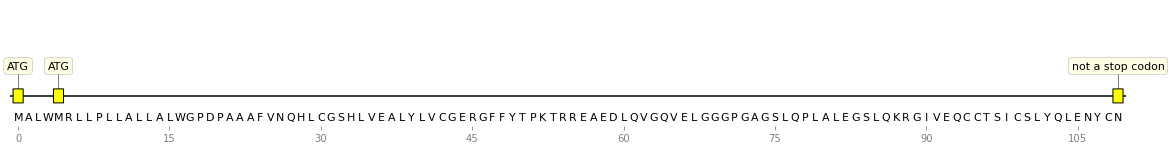

In [113]:
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=20, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

It shows the sequence of amino acids and an indication of the start codons "ATG". And there seems no stop condon in this aminoacid sequence.

# Task 2: Wrapping it all together with raw data

2.1 Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [114]:
def extract_seqs(fasta_file_path):
    """Extracts sequences from a fasta file path if the quality of all bases is >= Q10"""
    # Initialize an empty dictionary to hold sequence IDs and their corresponding sequences and quality strings.
    sequences={}
    # Initialize a counter to keep track of the line number within a record.
    i=1
    # Variables to hold the current record's ID, sequence, and quality.
    current_id=None
    current_sequence=None
    current_quality=None
     # Open the FASTQ file for reading.
    with open(fasta_file_path,'r') as file:
        # Iterate over each line in the file.
        for line in file:
            # Strip the newline character from the end of the line.
            line=line.strip()
            # If the line is the first in a 4-line record, it contains the sequence ID.
            if i%4==1:
                # Extract the sequence ID (ignoring the initial '@' character).
                # Reset the current sequence and quality to None for the new record.
                current_id=line[1:]
                current_sequence=None
                current_quality=None
            # If the line is the second in a 4-line record, it contains the sequence.
            elif i%4==2:
                current_sequence=line
            # If the line is the fourth in a 4-line record, it contains the quality scores.
            elif i%4==0:
                current_quality=line
            # If both the current sequence and quality are not None, proceed to check the quality.   
            if current_sequence!=None and current_quality!=None :
                 # Check if all quality scores are >= Q10 using ASCII conversion.
                if all(ord(q)-33>=10 for q in current_quality):
                    # If the quality is sufficient, add the sequence ID and a list of
                        # the sequence and quality to the dictionary.
                    sequences[current_id]=[current_sequence,current_quality]
            # Increment the line counter.
            i+=1
    # Return the dictionary of sequences and qualities.            
    return(sequences)

In [120]:
sequence_dic=extract_seqs('sample10000.fastq')
sequence_dic


In [116]:
class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTA file
    """
    def __init__(self, filepath):
        # Constructor for the Genome class, initializes dictionaries to store sequences.
        self.filepath = filepath# Path to the FASTA file
        self.dna_seqs ={}# Dictionary to store DNA sequences
        self.dna_complementary_seqs = {}# Dictionary to store complementary DNA sequences
        self.rna_seqs = {}# Dictionary to store RNA sequences
        self.aa_seqs = {}# Dictionary to store amino acid sequences
    
    # UPDATE THE FOLLOWING FUNCTIONS TO POPULATE THE ABOVE PROPERTIES
    def extract_seqs(self):
        # Extract DNA sequences from a FASTA file.
        i=1# Initialize a line counter
        current_id=None# Initialize a variable for the current sequence ID
        current_sequence=None # Initialize a variable for the current DNA sequence
        current_quality=None# Initialize a variable for the current quality scores
        with open(self.filepath,'r') as file:# Open the FASTA file for reading
            for line in file:# Loop through each line in the file
                line=line.strip() # Remove any whitespace from the ends of the line
                if i%4==1:# If the line is an ID line (every 4th line starting from the first)
                    current_id=line[1:]# Capture the ID, excluding the '>' character
                     # Reset the sequence and quality for the new entry
                    current_sequence=None
                    current_quality=None
                elif i%4==2:# If the line is a sequence line (every 4th line starting from the second)
                     # Capture the DNA sequence
                    current_sequence=line
                elif i%4==0:# If the line is a quality line (every 4th line)
                    
                    current_quality=line# Capture the quality scores

                if current_sequence!=None and current_quality!=None :
                    # Check that all quality scores are above a threshold (10 after ASCII adjustment)
                    if all(ord(q)-33>=10 for q in current_quality):
                        self.dna_seqs[current_id]=current_sequence
                # Increment the line counter
                i+=1

    
    def complementary_seqs(self):
         # Generate complementary sequences for the DNA sequences stored.
        if not self.dna_seqs:
            raise ValueError("The sequence is empty!") # If dna_seqs is empty, raise an error
        else:
            for seq_id,seq in self.dna_seqs.items():
                #Set a parameter 'new_str' to storage the generated complementary sequence.
                new_str=''
                #According to the complementarity principle generates the new string.
                #Here we use the ascII table to transfer the  character
                #In ASCII table, whether the character is upper case or lower case, there substraction is constant.
                #Thus We just need one if statement to transfer for example G to C or g to c.
                #The ord can transfer character to number and chr transfer number to character in ASCII.
                for s in range(0,len(seq)):
                    if seq[s].upper()=="G":
                        new_str=new_str+ chr(ord(seq[s])-4)
                    elif seq[s].upper()=="C":
                        new_str=new_str+chr(ord(seq[s])+4)
                    elif seq[s].upper()=="A":
                        new_str=new_str+chr(ord(seq[s])+19)
                    elif seq[s].upper()=="T":
                        new_str=new_str+chr(ord(seq[s])-19) 
                self.dna_complementary_seqs[seq_id]=new_str

    def rna_seq(self):
        # Generate RNA sequences from the complementary DNA sequences.
        if  not self.dna_complementary_seqs:
            raise ValueError('The sequence is empty!')
        else:
            for seq_id,seq in self.dna_complementary_seqs.items():
                # Replace thymine 'T' with uracil 'U' to create the RNA sequence
                self.rna_seqs[seq_id]=seq.replace('T','U')
    
    def aa_seq(self):
        # Generate amino acid sequences from the RNA sequences.
        if not self.rna_seqs:
            raise ValueError("The sequence is empty!")
        else:
            #Need to define a dictionary of triplet to amino acid mappings.
            codon_table = {
            "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
            "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
            "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
            "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
            "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
            "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
            "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
            "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
            "UAU": "Y", "UAC": "Y", "UAA": "*", "UAG": "*",
            "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
            "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
            "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
            "UGU": "C", "UGC": "C", "UGA": "*", "UGG": "W",
            "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
            "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
            "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G"}
            for seq_id,seq in self.rna_seqs.items():
                amino_acids=''# Initialize a string to hold the amino acid sequence
                i=0
                 # Loop through the sequence in triplets to translate into amino acids
                while i+3<=len(seq):
                    codon =seq[i:i+3]# Extract the codon (triplet)
                    # Translate the codon and append the amino acid to the sequence
                    if codon in codon_table:
                        amino_acids+=codon_table[codon]
                    i+=3# Move to the next codon
                # Store the amino acid sequence in the dictionary
                self.aa_seqs[seq_id]=amino_acids
                
                
    def annot_aa_plot(self, seqid):
        if not self.aa_seqs:
            raise ValueError("The sequence is empty!")
        else:
            seq=self.aa_seqs[seqid]
            # Create a SeqRecord object for the sequence
            protein = Seq(seq)
            protein_record = SeqRecord(protein, id=seqid, annotations={"molecule_type": "protein"})

            protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive
            # Create a graphical representation of the annotations
            graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
            # Plot the annotations and the sequence itself
            ax, _ = graphic_record.plot(figure_width=20, strand_in_label_threshold=7)
            graphic_record.plot_sequence(ax)

In [117]:
genome = Genome('sample10000.fastq')

In [118]:
genome.extract_seqs()
genome.complementary_seqs()
genome.rna_seq()
genome.aa_seq()


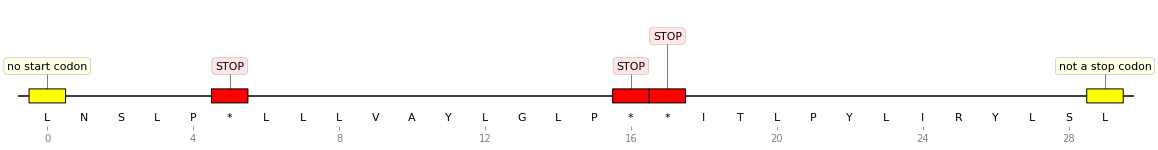

In [119]:
genome.annot_aa_plot('ERR016162.11626500 I354_1:1:39:2011:16189/2')